## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
from pandas_datareader import DataReader
from datetime import datetime

In [2]:
font = {'family': 'serif', 'serif': 'Cambria', 'weight': 'normal','size':14}
plt.rc('font',**font)

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [3]:
# pip install seaborn --upgrade

In [4]:
# !pip install pandas_datareader

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

In [5]:
df = DataReader(
    "AAPL",
    "yahoo",
    start=datetime(2017,1,1),
    end=datetime(2018,12,31)
)

df.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,29.082500,28.690001,28.950001,29.037500,115127600.0,27.219837
2017-01-04,29.127501,28.937500,28.962500,29.004999,84472400.0,27.189367


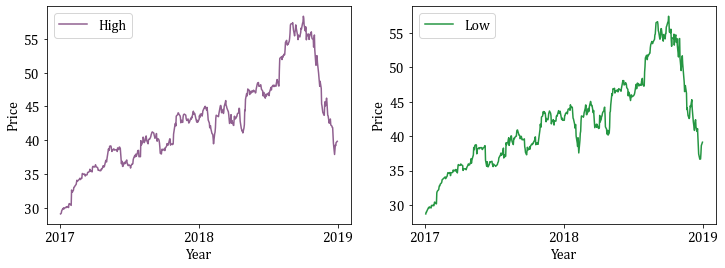

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
ax1.plot(df['High'],c='#906090', label='High')
ax2.plot(df['Low'],c='#259642', label='Low')

ax1.legend()
ax2.legend()

ax1.set_ylabel('Price')
ax1.set_xlabel('Year')

ax2.set_ylabel('Price')
ax2.set_xlabel('Year')


ax1.xaxis.set_major_locator(mdates.YearLocator())
ax2.xaxis.set_major_locator(mdates.YearLocator())

In [7]:
sns.__version__

'0.12.0'

In [8]:
df["year"] = df.index.year.astype(str)
df["quarter"] = df.index.quarter.astype(str)
df.head(2)

,High,Low,Open,Close,Volume,Adj Close,year,quarter
Date,,,,,,,,
2017-01-03,29.082500,28.690001,28.950001,29.037500,115127600.0,27.219837,2017,1
2017-01-04,29.127501,28.937500,28.962500,29.004999,84472400.0,27.189367,2017,1


Text(0.5, 1.0, 'QWEEQ')

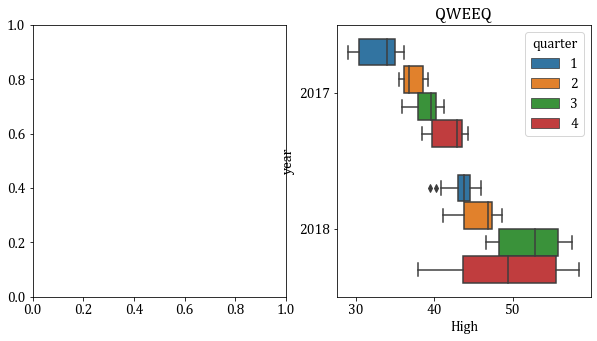

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1 = sns.boxplot(
    data=df,
    x="High",
    y="year",
    hue="quarter",
)
ax1.set_title("QWEEQ")

## Лабораторная работа №5

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

**1\.** В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 31.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня, по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [10]:
average_ratings = np.load('average_ratings.npy',)
ar_df = pd.DataFrame(average_ratings,
                     index=['waffle iron french toast','zwetschgenkuchen bavarian plum cake','lime tea']).T
ar_df

,waffle iron french toast,zwetschgenkuchen bavarian plum cake,lime tea
0,5.000000,7.000000,3.000000
1,5.013103,6.970750,2.996861
2,5.026240,7.000000,2.993725
3,5.013103,6.970750,2.996861
4,5.000000,6.941621,3.000000
...,...,...,...
1090,5.493987,10.000000,2.987464
1091,5.508384,10.000000,2.990593
1092,5.522819,10.000000,2.993725
1093,5.537292,10.000000,2.990593


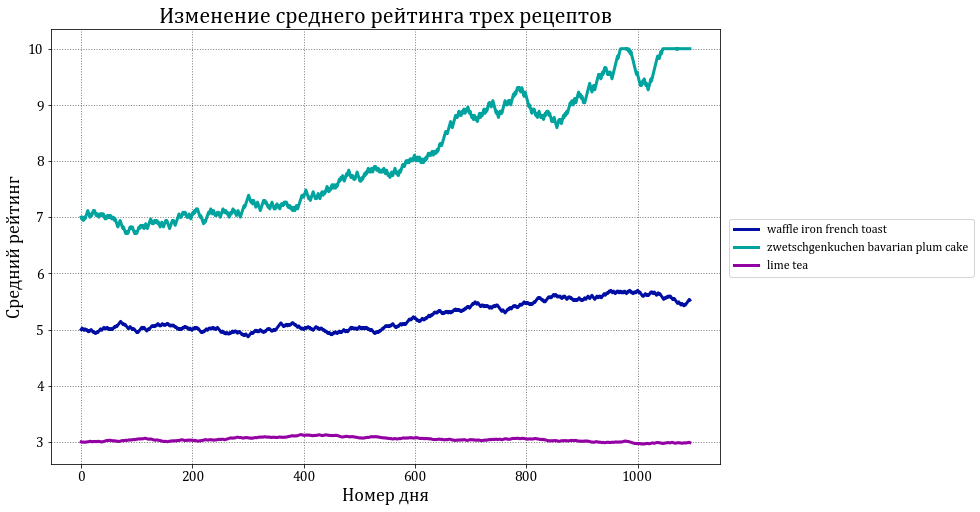

In [11]:
fig,ax = plt.subplots(figsize=(12, 8))
ax.grid(color='black', alpha=0.5, linestyle=':', linewidth=1)

ax.plot(ar_df['waffle iron french toast'],
        lw=3,
        c='#000EA3',
        label=str(ar_df.columns[0]))
ax.plot(ar_df['zwetschgenkuchen bavarian plum cake'],
        lw=3,
        c='#00A39E',
        label=str(ar_df.columns[1]))
ax.plot(ar_df['lime tea'],
        lw=3,
        c='#9300A3',
        label=str(ar_df.columns[2]))


ax.set_xlabel('Номер дня',fontsize=18)
ax.set_ylabel('Средний рейтинг',fontsize=18)
ax.set_title('Изменение среднего рейтинга трех рецептов',fontsize=22)

fig.legend(fontsize=12, loc='center right', bbox_to_anchor=(1.2, 0.5))

plt.show()

**2\.** Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 31.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


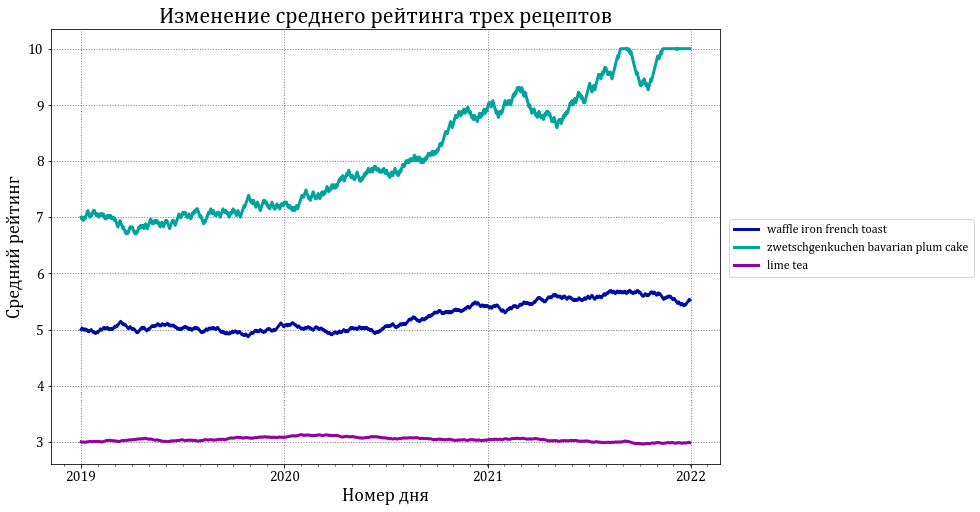

In [12]:
fig,ax = plt.subplots(figsize=(12, 8))

ax.plot(pd.date_range(start=datetime(2019, 1, 1), end=datetime(2021, 12, 30)).values,
        ar_df['waffle iron french toast'].values,
        lw=3,
        c='#000EA3',
        label=str(ar_df.columns[0]))
ax.plot(pd.date_range(start=datetime(2019, 1, 1), end=datetime(2021, 12, 30)).values,
        ar_df['zwetschgenkuchen bavarian plum cake'].values,
        lw=3,
        c='#00A39E',
        label=str(ar_df.columns[1]))
ax.plot(pd.date_range(start=datetime(2019, 1, 1), end=datetime(2021, 12, 30)).values,
        ar_df['lime tea'].values,
        lw=3,
        c='#9300A3',
        label=str(ar_df.columns[2]))

ax.set_xlabel('Номер дня',fontsize=18)
ax.set_ylabel('Средний рейтинг',fontsize=18)
ax.set_title('Изменение среднего рейтинга трех рецептов',fontsize=22)

fig.legend(fontsize=12, loc='center right', bbox_to_anchor=(1.2, 0.5))

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(12))

ax.grid(color='black', alpha=0.5, linestyle=':', linewidth=1)

plt.show()

**3\.** Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

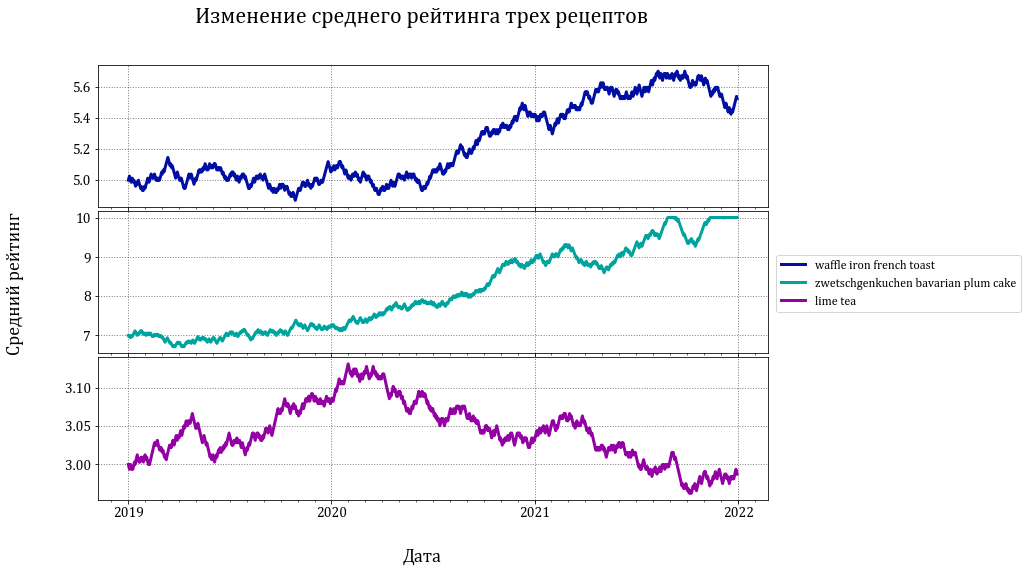

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,8), sharex=True,)

ax1.plot(pd.date_range(start=datetime(2019, 1, 1), end=datetime(2021, 12, 30)).values,
        ar_df['waffle iron french toast'].values,
        lw=3,
        c='#000EA3',
        label=str(ar_df.columns[0]))
ax2.plot(pd.date_range(start=datetime(2019, 1, 1), end=datetime(2021, 12, 30)).values,
        ar_df['zwetschgenkuchen bavarian plum cake'].values,
        lw=3,
        c='#00A39E',
        label=str(ar_df.columns[1]))
ax3.plot(pd.date_range(start=datetime(2019, 1, 1), end=datetime(2021, 12, 30)).values,
        ar_df['lime tea'].values,
        lw=3,
        c='#9300A3',
        label=str(ar_df.columns[2]))

plt.subplots_adjust(hspace=0.03)

fig.supxlabel('Дата',fontsize=18)
fig.supylabel('Средний рейтинг',fontsize=18)
fig.suptitle('Изменение среднего рейтинга трех рецептов',fontsize=22)

fig.legend(fontsize=12, loc='center right', bbox_to_anchor=(1.2, 0.5))

ax3.xaxis.set_major_locator(mdates.YearLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
for ax in [ax1,ax2,ax3]:
    ax.grid(color='black', alpha=0.5, linestyle=':', linewidth=1)
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(12))


ax.grid(color='black', alpha=0.5, linestyle=':', linewidth=1)

plt.show()

**4\.** В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтали. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


In [14]:
visitors = np.load('visitors.npy')

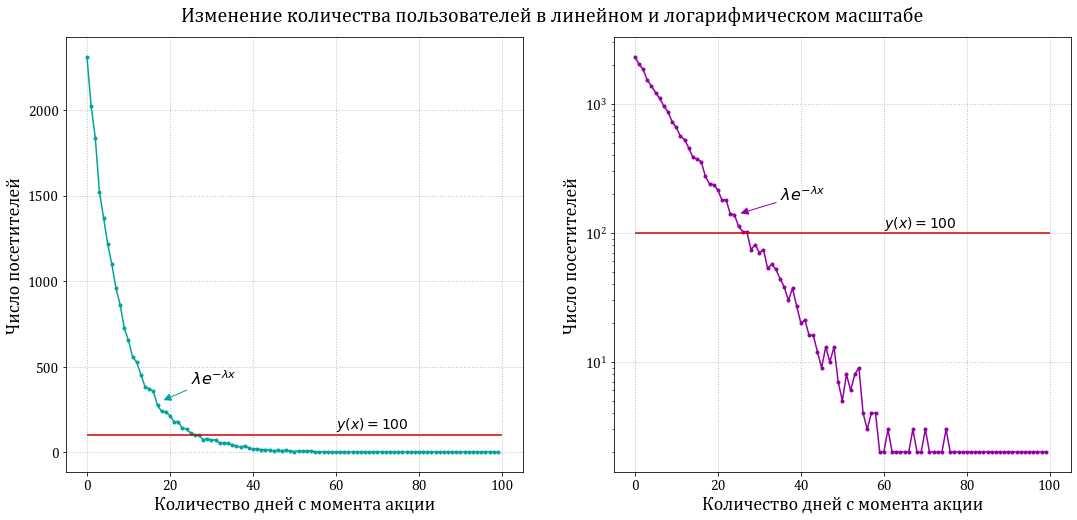

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,8))

ax1.plot(visitors,
         color='#00A39E',
         marker='.',)
ax2.plot(visitors,
         color='#9300A3',
         marker = '.')
ax2.set_yscale('log')

fig.supxlabel('Изменение количества пользователей в линейном и логарифмическом масштабе', 
              x=0.5, y=0.9, fontsize=20)

for ax in [ax1,ax2]:
    ax.hlines(100, xmin=0, xmax=100, color='#D10000')
    ax.grid(color='black', alpha=0.25, linestyle=':', linewidth=1)
    ax.set_xlabel('Количество дней с момента акции',fontsize=18)
    ax.set_ylabel('Число посетителей',fontsize=18)

ax1.annotate('$\lambda e^{-\lambda x} $',
             xy = (18, 300), xytext = (25, 400), 
             fontsize = 16, arrowprops = dict(arrowstyle="-|>", color='#00A39E'))
ax1.annotate('$y(x)=100$',xy = (60, 140), fontsize = 14)

ax2.annotate('$\lambda e^{-\lambda x} $',
             xy = (25, 140), xytext = (35, 180), 
             fontsize = 16, arrowprops = dict(arrowstyle="-|>", color='#9300A3'))
ax2.annotate('$y(x)=100$',xy = (60, 110), fontsize = 14)

plt.show()

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [16]:
reviews = pd.read_csv('reviews_sample.csv')
reviews.set_index('Unnamed: 0',inplace=True)
reviews.index.name = 'index'
recipes = pd.read_csv('recipes_sample.csv')

In [17]:
reviews

,user_id,recipe_id,date,rating,review
index,,,,,
370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...
...,...,...,...,...,...
1013457,1270706,335534,2009-05-17,4,This recipe was great! I made it last night. I...
158736,2282344,8701,2012-06-03,0,This recipe is outstanding. I followed the rec...
1059834,689540,222001,2008-04-08,5,"Well, we were not a crowd but it was a fabulou..."


**5\.** Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [18]:
term = [recipes.minutes >= 50, (recipes.minutes < 50)&(recipes.minutes >= 5), recipes.minutes < 5]
size = ['long', 'medium' ,'short']
    
recipes['duration'] = np.select(term, size)
recipes.head()

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients,duration
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0,long
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN,medium
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0,medium
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN,medium
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN,medium


Сгруппированная по категории продолжительности таблица рецептов

In [19]:
recipes.groupby('duration').count()

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
duration,,,,,,,,
long,11718,11718,11718,11718,11718,7351,11521,8222
medium,17607,17607,17607,17607,17607,11041,17279,12416
short,675,675,675,675,675,418,577,482


Среднее количество шагов рецептов для каждой категории продолжительности

In [20]:
recipes.groupby('duration')['n_steps'].mean()

duration
long      11.917290
medium     8.581922
short      4.990431
Name: n_steps, dtype: float64

Количество рецептов в каждой категории продолжительности

In [21]:
recipes.groupby('duration')['id'].count()

duration
long      11718
medium    17607
short       675
Name: id, dtype: int64

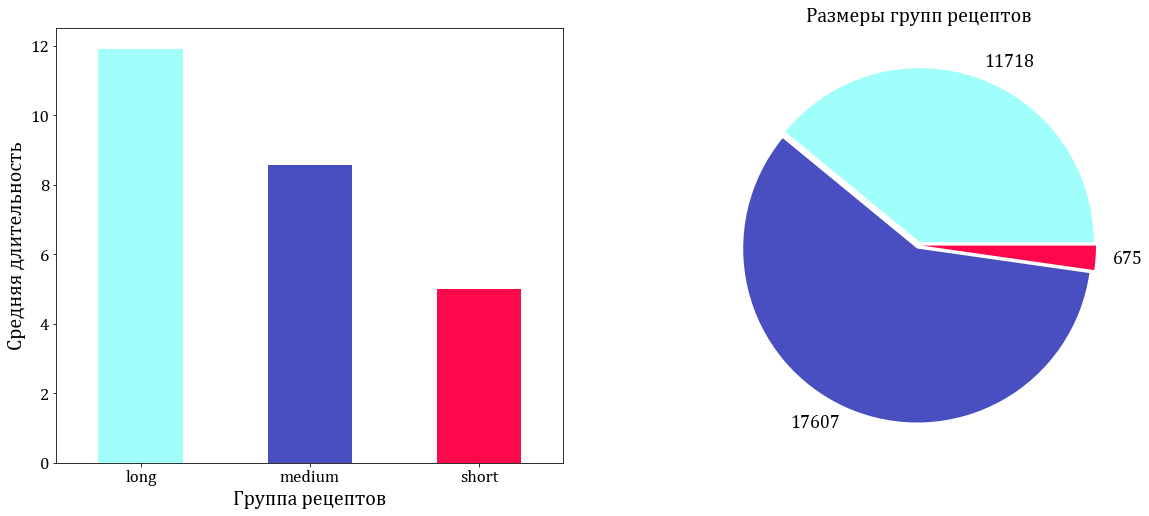

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(20,8))
histogram = recipes.groupby('duration')['n_steps'].mean().plot(kind="bar",
                                                               fontsize = 17,
                                                               rot=False,
                                                               color = ['#A0FEFB','#494FC1','#FD084A'],
                                                               ax=axes[0])
histogram.set_xlabel("Группа рецептов", fontsize = 20)
histogram.set_ylabel("Средняя длительность", fontsize = 20)


diagram = recipes.groupby('duration')['id'].count().plot.pie(labels=recipes.groupby('duration')['id'].count().values,
                                                             colors=['#A0FEFB','#494FC1','#FD084A'],              
                                                             fontsize=18,
                                                             explode=(0.02,0.02,0.02),
                                                             ax=axes[1])
diagram.set_ylabel("")
diagram.set_title("Размеры групп рецептов", fontsize = 20)

plt.show()

**6\.** Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

In [23]:
reviews.date = pd.to_datetime(reviews.date, format = '%Y-%m-%d')

In [24]:
reviews = reviews.iloc[np.where((reviews.date.dt.year==2008)|(reviews.date.dt.year==2009))]

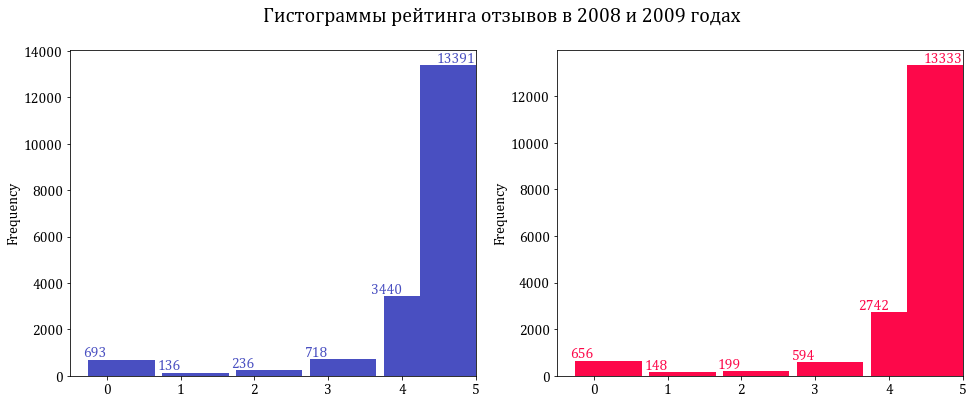

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))
fig.suptitle("Гистограммы рейтинга отзывов в 2008 и 2009 годах", fontsize = 20)
colors = ['#494FC1','#FD084A']
years = [2008, 2009]

reviews.iloc[np.where(reviews.date.dt.year==years[0])]['rating'].plot.hist(color=colors[0],
                                                                       width=0.9,
                                                                       align='left',
                                                                       ax=axes[0])

reviews.iloc[np.where(reviews.date.dt.year==years[1])]['rating'].plot.hist(color=colors[1],
                                                                       width=0.9,
                                                                       align='left',
                                                                       ax=axes[1])


for year in years:
    x = reviews.iloc[np.where(reviews.date.dt.year==year)].groupby('rating')['user_id'].count().index.values
    y = reviews.iloc[np.where(reviews.date.dt.year==year)].groupby('rating')['user_id'].count().values
    for i in range(len(x)):
        axes[year-2008].text(i, y[i], y[i], ha='right', va ='bottom', color = colors[year-2008])



### Визуализация данных при помощи пакета `seaborn`

**7\.** При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

In [26]:
term = [recipes.minutes >= 50, (recipes.minutes < 50)&(recipes.minutes >= 5), recipes.minutes < 5]
size = ['long', 'medium' ,'short']
    
recipes['duration'] = np.select(term, size)

<AxesSubplot:title={'center':'Диаграмма рассеяния n_steps и n_ingredients'}, xlabel='n_steps', ylabel='n_ingredients'>

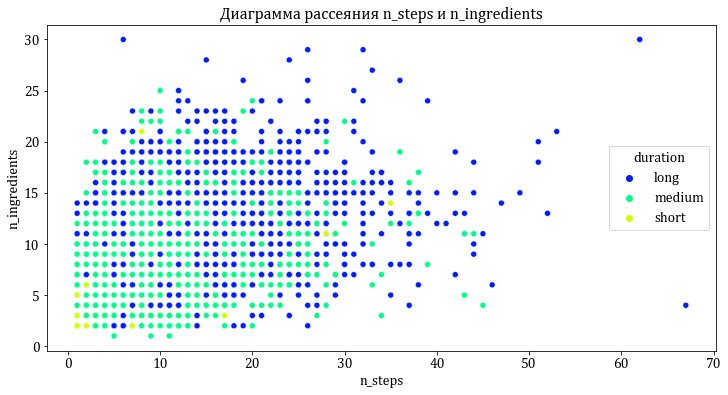

In [27]:
plt.figure(figsize=(12, 6))
plt.title("Диаграмма рассеяния n_steps и n_ingredients", fontsize=16)
sns.scatterplot(x=recipes.n_steps,
                y=recipes.n_ingredients, 
                hue=recipes.duration,
                palette='gist_rainbow_r')

*Очевидной линейной зависимости на графике рассеяния мы не видим, это значит, что количество ингредентов в рецептах не так сильно зависит от количества шагов в соответствующих рецептах*

**8\.** Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов `"minutes"`, `"n_steps"`, `"n_ingredients"` и `"rating"`. При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

In [28]:
reviewed_recipes = reviews.merge(recipes, left_on='recipe_id', right_on='id',).drop(columns=['id'])

In [29]:
reviewed_recipes.head(1)

,user_id,recipe_id,date,rating,review,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients,duration
0,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy...",cottage cheese honey and cinnamon on toast,27,182809,2007-09-11,6.0,wow! what a long title for such a quick treat...,4.0,medium


In [30]:
corr_matrix = reviewed_recipes[['minutes', 'n_steps', 'n_ingredients','rating']].corr()
corr_matrix

,minutes,n_steps,n_ingredients,rating
minutes,1.000000,0.017637,-0.000694,-0.023326
n_steps,0.017637,1.000000,0.326711,-0.001812
n_ingredients,-0.000694,0.326711,1.000000,-0.012404
rating,-0.023326,-0.001812,-0.012404,1.000000


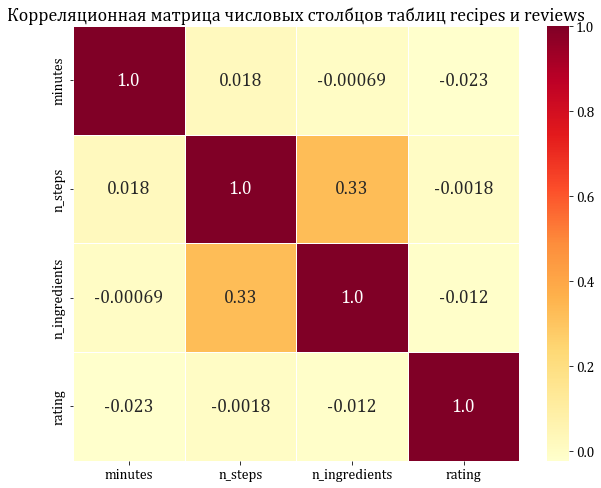

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
            linewidths=.5, 
            annot=True, fmt=".2", annot_kws={'fontsize':18}, 
            cmap='YlOrRd').set_title('Корреляционная матрица числовых столбцов таблиц recipes и reviews', fontsize=18)
plt.show()